In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import tensorflow_datasets as tfds

Hot dog is label 55

In [3]:
ds, ds_info = tfds.load('food101', shuffle_files=True, as_supervised=True, with_info=True)

In [4]:
train_ds,valid_ds = ds["train"],ds["validation"]

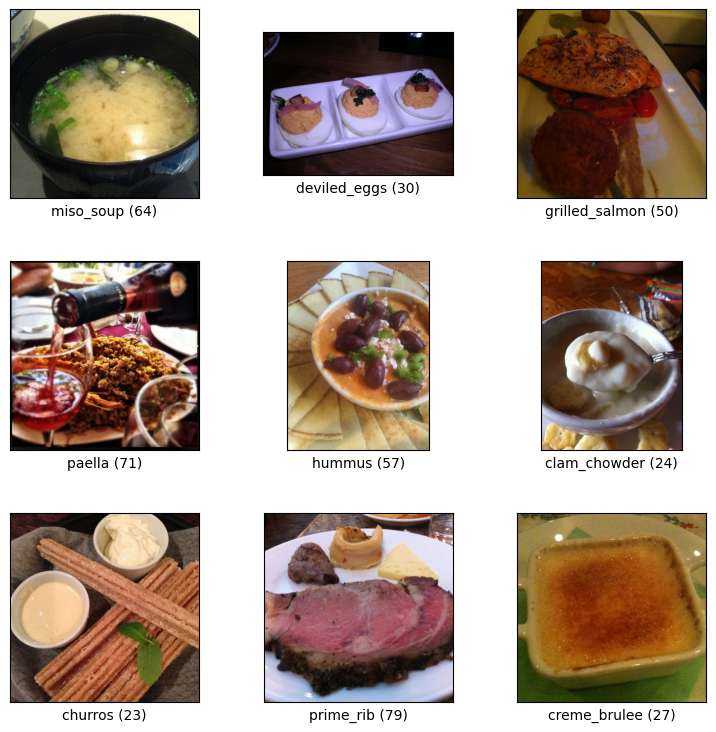

In [5]:
fig = tfds.show_examples(train_ds, ds_info)

In [6]:
MAX_SIDE_LEN = 128
HOT_DOG_CLASS = 55

# Eğitim verisetini düzenleme
train_ds = train_ds.map(
    lambda image, label: (
        tf.cast(tf.image.resize(image, [MAX_SIDE_LEN, MAX_SIDE_LEN]), dtype=tf.int32),
        tf.cast(label == HOT_DOG_CLASS, tf.int32)
    )
)

# Doğrulama verisetini düzenleme
valid_ds = valid_ds.map(
    lambda image, label: (
        tf.cast(tf.image.resize(image, [MAX_SIDE_LEN, MAX_SIDE_LEN]), dtype=tf.int32),
        tf.cast(label == HOT_DOG_CLASS, tf.int32)
    )
)


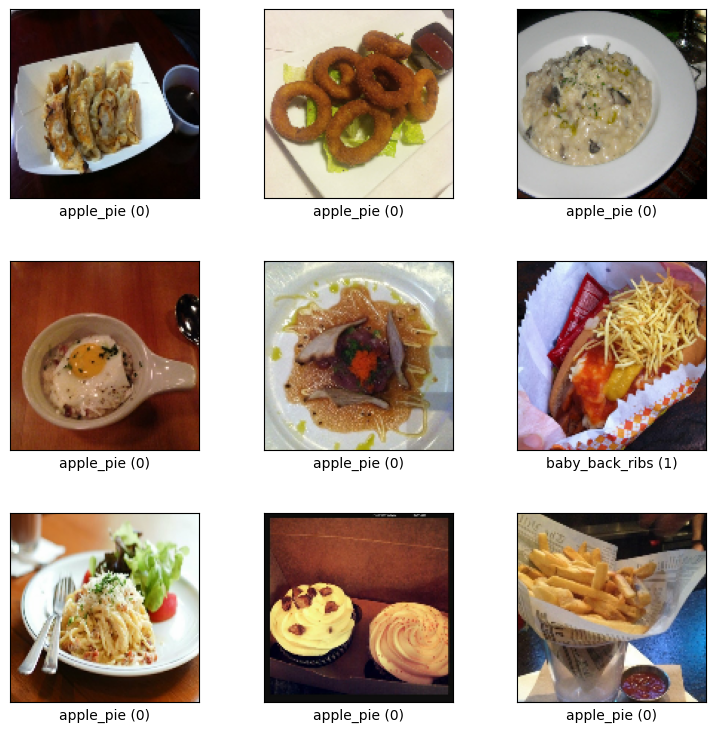

In [7]:
fig = tfds.show_examples(train_ds,ds_info)

In [8]:
train_hd_size,valid_hd_size = 750,250
train_hotdogs = train_ds.filter(lambda image,label:label == 1).repeat(3)
train_nothotdogs = train_ds.filter(lambda image, label:label ==0)

In [9]:
valid_hotdogs = valid_ds.filter(lambda image,label:label == 1).repeat(3)
valid_nothotdogs = valid_ds.filter(lambda image, label:label ==0)

In [10]:
# ÖNEMLİ YER
batch_size = 16
train_ds = tf.data.Dataset.sample_from_datasets([train_hotdogs,train_nothotdogs],
                                                [0.5,0.5],#%50,%50
                                                stop_on_empty_dataset=True)
train_ds = train_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

valid_ds = tf.data.Dataset.sample_from_datasets([valid_hotdogs,valid_nothotdogs],
                                                [0.5,0.5],#%50,%50
                                                stop_on_empty_dataset=True)
valid_ds = valid_ds.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [11]:
for image_batch, label_batch in train_ds.take(1):
  print(image_batch)
  print(label_batch)

tf.Tensor(
[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  8   9   4]
   [  7   7   5]
   [  7   7   5]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  6   7   2]
   [  7   7   5]
   [ 11  11   9]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 12  13   8]
   [ 11  11   9]
   [  9   9   7]]

  ...

  [[ 37  36  47]
   [ 32  33  38]
   [ 40  41  45]
   ...
   [165 174 176]
   [218 228 229]
   [240 250 250]]

  [[ 40  42  49]
   [ 19  21  26]
   [ 27  28  32]
   ...
   [ 98 107 109]
   [126 136 137]
   [168 179 179]]

  [[ 58  62  68]
   [ 43  47  50]
   [ 67  68  70]
   ...
   [171 179 181]
   [202 209 211]
   [ 91  96  99]]]


 [[[180 186 200]
   [180 186 200]
   [181 187 201]
   ...
   [170 181 199]
   [171 179 198]
   [169 177 196]]

  [[184 190 204]
   [184 190 204]
   [185 191 205]
   ...
   [176 187 205]
   [176 184 203]
   [174 182 201]]

  [[190 193 208]
   [190 193 208]
   [191 194 209]
   ...
   [179 190 208]
   [177 188 206]


# Neural Net Implementation

In [12]:
from threading import active_count
# CNN inşası Önemli

random.seed(0)
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=[MAX_SIDE_LEN,MAX_SIDE_LEN,3]))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Training

lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model.fit(train_ds,
                    validation_data=valid_ds,
                    epochs=epochs,
                    verbose=1)

üsteki gibi yapınca aynı şeyleri çok tekrardan ezberliyor ve %100 doğru sonuç çıkartmaya başlıyor ama yeni data geldimi hata oranı yine yüksek oluyor

In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2)
])

In [15]:
for i,_ in ds["train"].take(1):
  image = i

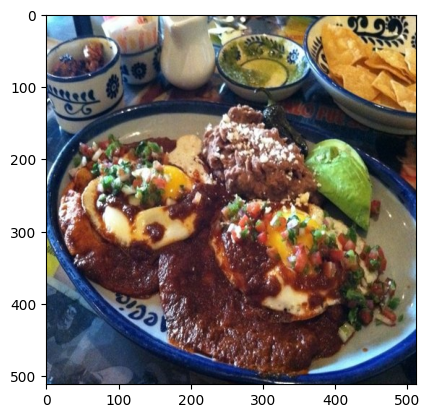

In [16]:
plt.imshow(image)

In [17]:
image = tf.cast(tf.expand_dims(image,0),tf.float32)
image /= 255.0

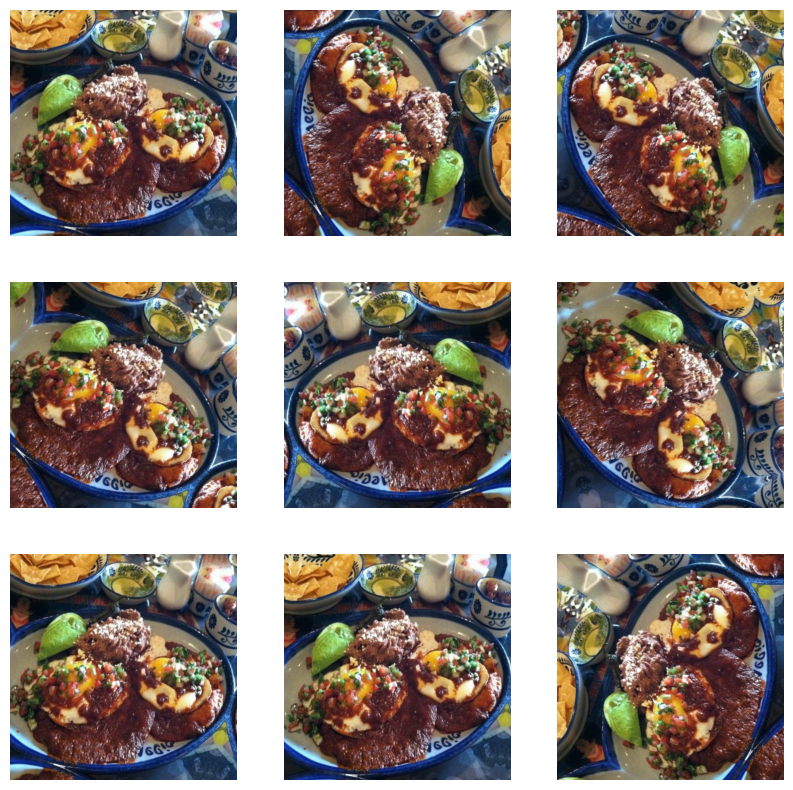

In [18]:
plt.figure(figsize=(10,10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [19]:
random.seed(0)
model = models.Sequential()
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(MAX_SIDE_LEN, MAX_SIDE_LEN, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(1))

In [20]:
# Training

lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs = 50
history = model.fit(train_ds,
                    validation_data=valid_ds,
                    epochs=epochs,
                    verbose=1)

Epoch 1/50
    279/Unknown 363s 1s/step - accuracy: 0.4943 - loss: 1.7377

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


279/279 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - accuracy: 0.4944 - loss: 1.7369 - val_accuracy: 0.5211 - val_loss: 1.1885
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5403 - loss: 1.1022 - val_accuracy: 0.5575 - val_loss: 0.9223
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5798 - loss: 0.8869 - val_accuracy: 0.6098 - val_loss: 0.8156
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6039 - loss: 0.7928 - val_accuracy: 0.6290 - val_loss: 0.7506
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6219 - loss: 0.7405 - val_accuracy: 0.6462 - val_loss: 0.7182
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6424 - loss: 0.7020 - val_accuracy: 0.6897 - val_loss: 0.6840
Epoch 7/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6723 - loss: 0.6596 - val_accuracy: 0.7114 - val_loss: 0.6621
Epoch 8/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7009 - loss: 0.6194 - val_accuracy: 0.680

In [22]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in valid_ds.take(1):
  images = image_batch
  labels = label_batch

<Figure size 1000x1000 with 0 Axes>

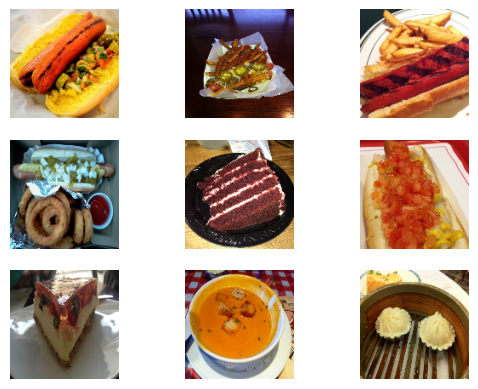

In [23]:
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(images[i])
  plt.axis("off")

In [24]:
labels[:9]

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int32)>